# Business Problem Understanding

The task is to develop a language model to accurately predict the disease given a short description of the symptoms faced by the user.


Such models can be used to identify potential diseases early on, allowing patients to seek medical attention and treatment promptly. Also, In situations where in-person consultations are not possible or desirable, the app can be used to provide remote diagnosis and treatment recommendations based on the user's symptoms


The dataset consists of 1200 datapoints and has two columns: "label" and "text".

1.label : contains the disease labels.  
2.text : contains the natural language symptom descriptions.

The dataset comprises 24 different diseases, and each disease has 50 symptom descriptions, resulting in a total of 1200 datapoints.

Psoriasis, Varicose Veins, Typhoid, Chicken pox, Impetigo, Dengue, Fungal infection, Common Cold, Pneumonia, Dimorphic Hemorrhoids, Arthritis, Acne, Bronchial Asthma, Hypertension, Migraine, Cervical spondylosis, Jaundice, Malaria, urinary tract infection, allergy, gastroesophageal reflux disease, drug reaction, peptic ulcer disease, diabetes


# Limitations:-
    The project has certain limitations.
    The precriptions are valid for Only 24 Disease which are given in the Dataset.so the model will predict accordingly.
    

In [1]:
#pip install wordcloud

In [2]:
#importing the libraries
import numpy as np 
import pandas as pd
import nltk
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.io as pio

#Grid Search
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#pipeline
from sklearn.pipeline import Pipeline

#metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#avoiding the warnings
import warnings
warnings.simplefilter("ignore")

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer

In [3]:
df = pd.read_csv('Symptom2Disease.csv')
df

Unnamed: 0      label                                               text
0              0  Psoriasis  I have been experiencing a skin rash on my arm...
1              1  Psoriasis  My skin has been peeling, especially on my kne...
2              2  Psoriasis  I have been experiencing joint pain in my fing...
3              3  Psoriasis  There is a silver like dusting on my skin, esp...
4              4  Psoriasis  My nails have small dents or pits in them, and...
...          ...        ...                                                ...
1195         295   diabetes  I'm shaking and trembling all over. I've lost ...
1196         296   diabetes  Particularly in the crevices of my skin, I hav...
1197         297   diabetes  I regularly experience these intense urges and...
1198         298   diabetes  I have trouble breathing, especially outside. ...
1199         299   diabetes  I constantly sneeze and have a dry cough. My i...

[1200 rows x 3 columns]

In [4]:
#droping the unwanted feature
df = df.drop('Unnamed: 0', axis=1)
df

label                                               text
0     Psoriasis  I have been experiencing a skin rash on my arm...
1     Psoriasis  My skin has been peeling, especially on my kne...
2     Psoriasis  I have been experiencing joint pain in my fing...
3     Psoriasis  There is a silver like dusting on my skin, esp...
4     Psoriasis  My nails have small dents or pits in them, and...
...         ...                                                ...
1195   diabetes  I'm shaking and trembling all over. I've lost ...
1196   diabetes  Particularly in the crevices of my skin, I hav...
1197   diabetes  I regularly experience these intense urges and...
1198   diabetes  I have trouble breathing, especially outside. ...
1199   diabetes  I constantly sneeze and have a dry cough. My i...

[1200 rows x 2 columns]

In [5]:
#checking for basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [6]:
#checking for any null values.
df.isna().sum()

label    0
text     0
dtype: int64

In [7]:
df.describe()

label                                               text
count        1200                                               1200
unique         24                                               1153
top     Psoriasis  I've been feeling extremely scratchy, sick, an...
freq           50                                                  4

In [8]:
#checking the unique disease.
df['label'].unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

Psoriasis                          50
Varicose Veins                     50
peptic ulcer disease               50
drug reaction                      50
gastroesophageal reflux disease    50
allergy                            50
urinary tract infection            50
Malaria                            50
Jaundice                           50
Cervical spondylosis               50
Migraine                           50
Hypertension                       50
Bronchial Asthma                   50
Acne                               50
Arthritis                          50
Dimorphic Hemorrhoids              50
Pneumonia                          50
Common Cold                        50
Fungal infection                   50
Dengue                             50
Impetigo                           50
Chicken pox                        50
Typhoid                            50
diabetes                           50
Name: label, dtype: int64


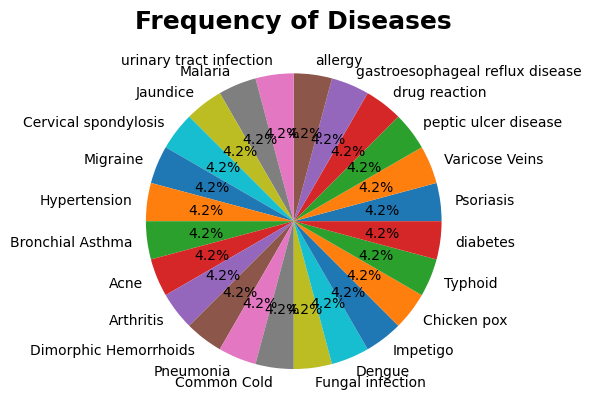

In [9]:
x = df['label'].value_counts()
print(x)
plt.pie(x, labels=x.index, autopct='%1.1f%%')

# Add title and ylabel
plt.title('Frequency of Diseases',fontsize=18, fontweight='bold')
plt.show()

# The inference we get:-

 Each Unique Disease has 50 different-different text-precriptions. conclusion is that each disease will be trained with 50    different Text precriptions.  

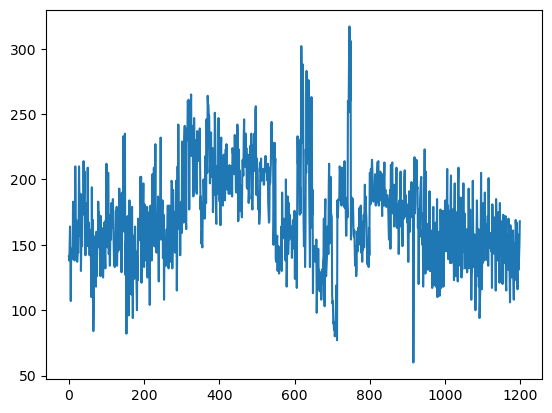

In [10]:
word_length = [len(str(x)) for x in df['text']]
plt.plot(word_length)

 We can see that the maximum length of the text precription is 1200 and the distribution is nearly uniform

In [11]:
# frequency of word which are most occure in uncleaned data
df1=df.head(70000)
py.init_notebook_mode()
all_words = df1['text'].str.split(expand=True).unstack().value_counts()
dat = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=dat, layout=layout)

py.iplot(fig, filename='basic-bar')


fig.show(renderer="colab")



These words are all so commonly occuring words which you could find just anywhere else.Therefore we must find some way 
to preprocess our dataset first to strip out all these commonly occurring words which do not bring much to the table.


# WordCloud for Text Precriptions
Plotting the wordcloud for each category, larger the size of the word in plot, larger the frequency of occurence

Psoriasis


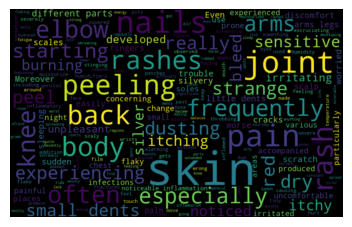

Varicose Veins


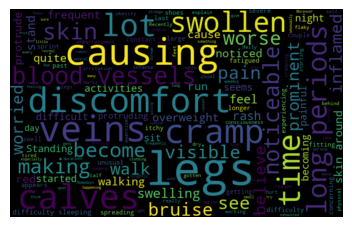

Typhoid


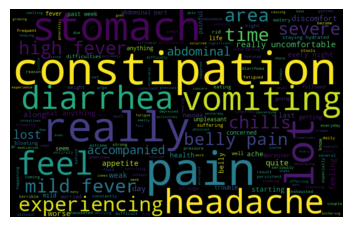

Chicken pox


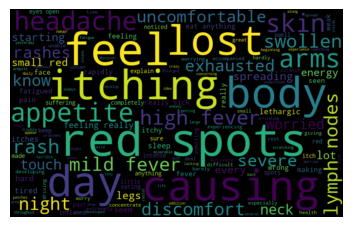

Impetigo


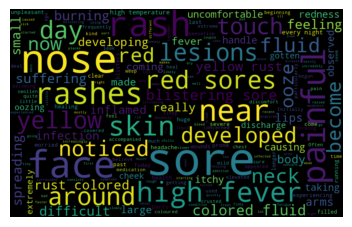

Dengue


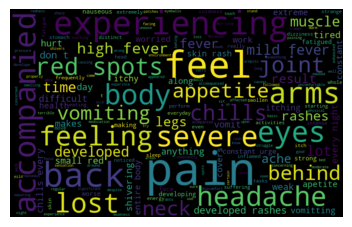

Fungal infection


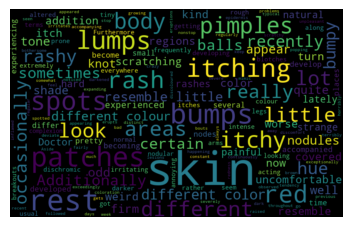

Common Cold


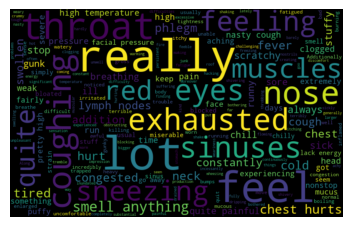

Pneumonia


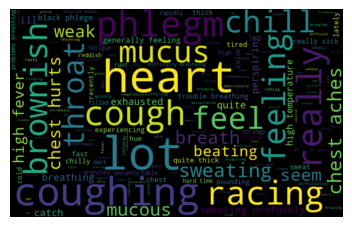

Dimorphic Hemorrhoids


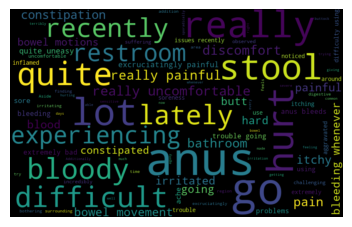

Arthritis


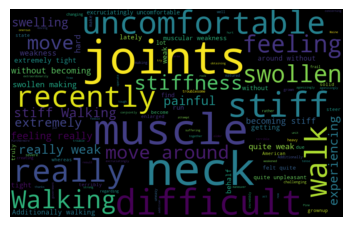

Acne


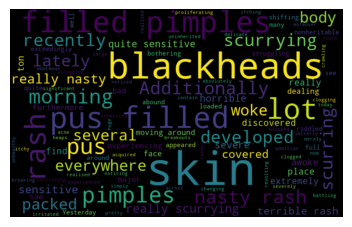

Bronchial Asthma


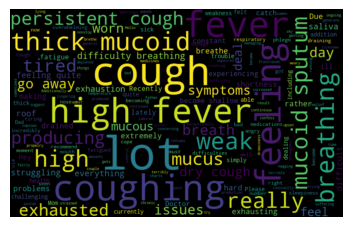

Hypertension


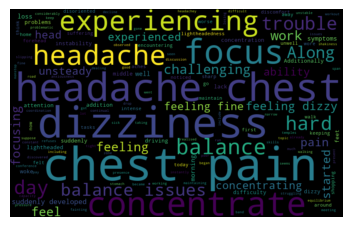

Migraine


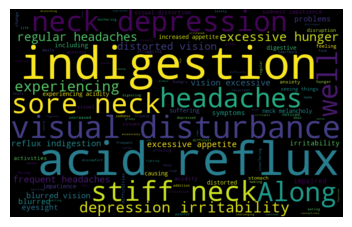

Cervical spondylosis


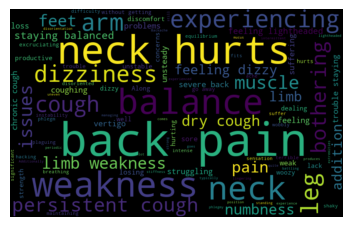

Jaundice


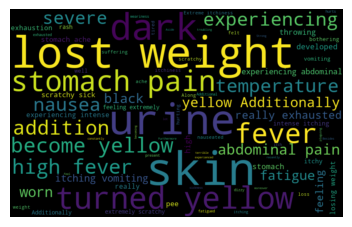

Malaria


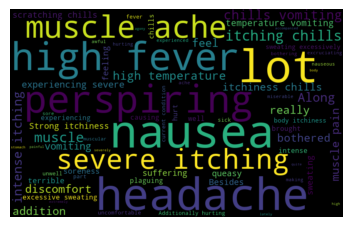

urinary tract infection


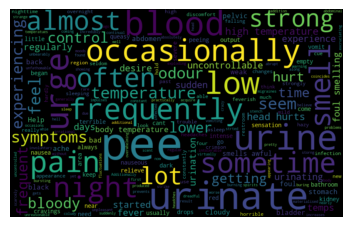

allergy


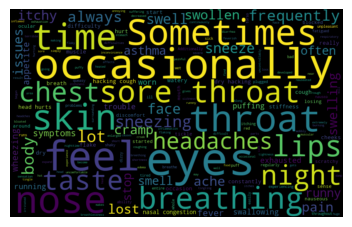

gastroesophageal reflux disease


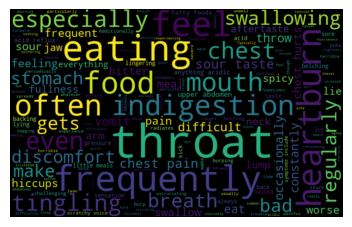

drug reaction


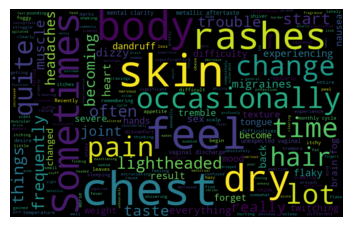

peptic ulcer disease


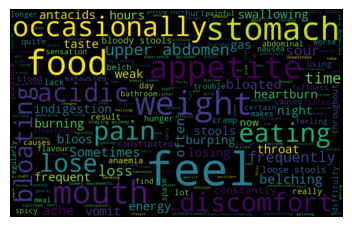

diabetes


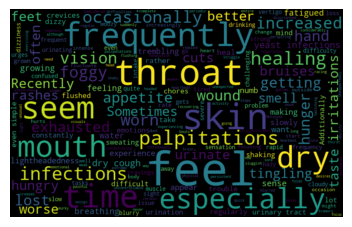

In [49]:
i=0
for product_name in df['label'].unique():
    print(product_name)
    all_words = ' '.join([str(text) for text in df.loc[df['label'].str.contains(product_name),'text']])
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
    plt.figure(figsize=(30, 20))
    plt.subplot(4,6,i+1)
    i+=1
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    #fig.tight_layout()
    plt.show()

# NLP Data Preprocessing
The feature for prediction in the data is column tweet, which is in the string format. classification models cannot predict on string data.
so should convert the strings of words into numerical format which represent most of the useful information present in the textual data. 
For that purpose we use NLP preprocessing of the data. Which words in 4 important steps namely.

Tokenization
Stopword removal
Stemming
Vectorization

# Data Cleaning 

Here we are converting the raw data to structured text data .
It includes the removal of Noise,inconsistencies, and unwanted elements that can negatively affect the performance of downstream tasks such as text classification, sentiment analysis, or machine translation.

So here in textcleaning we are removing Puntuation ,removing stopwords, stemming/lemmatization.

In [13]:
corpus = []
ps = PorterStemmer()

for i in range(len(df)):
    rp = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    rp = rp.lower()
    rp = rp.split()
    rp = [ps.stem(word) for word in rp if word not in set(stopwords.words('english'))]
    rp = " ".join(rp)
    corpus.append(rp)

In [14]:
print(corpus)

['experienc skin rash arm leg torso past week red itchi cover dri scali patch', 'skin peel especi knee elbow scalp peel often accompani burn sting sensat', 'experienc joint pain finger wrist knee pain often achi throb get wors move joint', 'silver like dust skin especi lower back scalp dust made small scale flake easili scratch', 'nail small dent pit often feel inflammatori tender touch even minor rash arm', 'skin palm sole thicken deep crack crack pain bleed easili', 'skin around mouth nose eye red inflam often itchi uncomfort notic inflamm nail', 'skin sensit react easili chang temperatur humid often care product use skin', 'notic sudden peel skin differ part bodi mainli arm leg back also face sever joint pain skin rash', 'skin genit red inflam often itchi burn uncomfort rash differ part bodi', 'experienc fatigu gener feel malais often feel tire lack energi even good night sleep', 'rash skin spread part bodi includ chest abdomen itchi uncomfort often wors night also face skin peel', 

# Text Vectorization (Converting Text data to Numeric Data)

The data present in the target column is in the string format but for classification we need it in the numerical format so to convert data to numerical format we use bag of words approach. which basically counts the number of unique words present in each complaint and project it into a sparse matrix.

creating a corpus of the data
for vectorization we need to join the list of seperate words back into a corpus

Count vectorizer (Bag of Words)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [16]:
np.shape(X)

(1200, 1102)

# Label encoding 
Label encoding of the target column for classification

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df['label'])
print(Y)

[15 15 15 ... 19 19 19]


# Train Test split
For the evaluation of the model. We split the data into two parts namely training and testing

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,Y ,test_size=0.2,random_state=0 )

In [19]:
#Append empty list
Accuracy =[]

# Classification models
      LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred_logistic=model.predict(X_test)

0.9625
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         7
           4       0.88      0.78      0.82         9
           5       1.00      1.00      1.00        10
           6       0.71      0.83      0.77         6
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00         7
          15       1.00      0.92      0.96        12
          16       0.80      1.00      0.89         4
          17       1

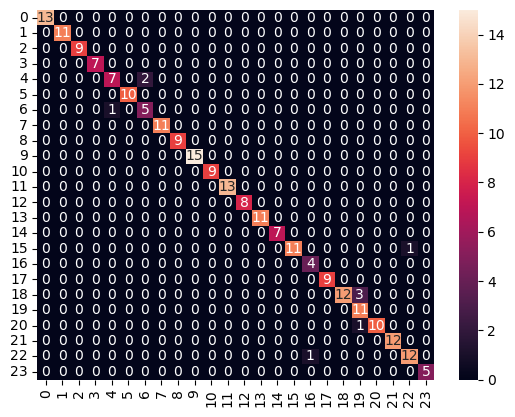

In [21]:
acc_logistic = accuracy_score(y_test,y_pred_logistic)
print(acc_logistic)
print(classification_report(y_test,y_pred_logistic))
sns.heatmap(confusion_matrix(y_test,y_pred_logistic),annot=True)
Accuracy.append(acc_logistic)

 From Logistic Regression Model we got a 96% accuracy for Text Precriptions.



# Multinomial Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
ypred_NB = model.predict(X_test)

0.9458333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         7
           4       1.00      0.67      0.80         9
           5       0.83      1.00      0.91        10
           6       0.67      1.00      0.80         6
           7       0.92      1.00      0.96        11
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        11
          14       0.88      1.00      0.93         7
          15       1.00      0.92      0.96        12
          16       0.67      1.00      0.80         4
        

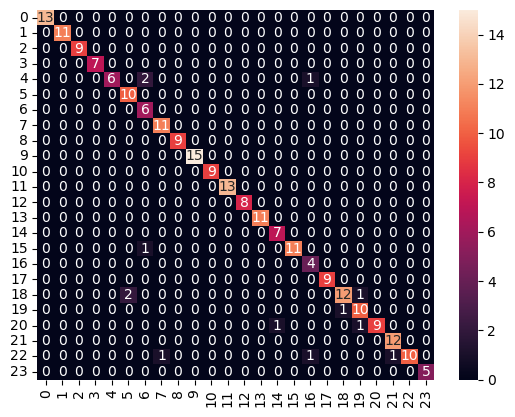

In [23]:
acc_NB = accuracy_score(y_test,ypred_NB)
print(acc_NB)
print(classification_report(y_test,ypred_NB))
sns.heatmap(confusion_matrix(y_test,ypred_NB),annot=True)
Accuracy.append(acc_NB)

From Multinomial Naive Bayes Model we got a 94% accuracy For Text Precriptions

# KNN 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
ypred_knn=model.predict(X_test)

0.925
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         7
           4       0.60      1.00      0.75         9
           5       1.00      0.80      0.89        10
           6       0.57      0.67      0.62         6
           7       1.00      1.00      1.00        11
           8       1.00      0.89      0.94         9
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         8
          13       0.73      1.00      0.85        11
          14       0.88      1.00      0.93         7
          15       1.00      0.75      0.86        12
          16       0.75      0.75      0.75         4
          17       1.

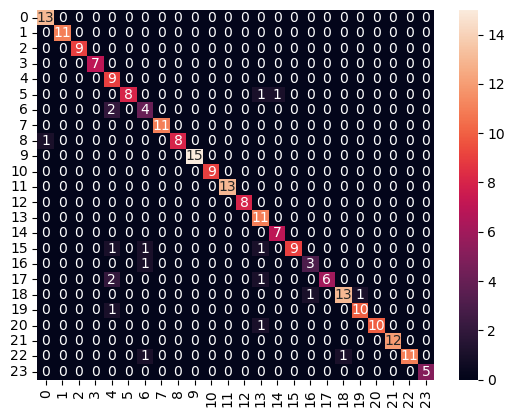

In [25]:
acc_knn = accuracy_score(y_test,ypred_knn)
print(acc_knn)
print(classification_report(y_test,ypred_knn))
sns.heatmap(confusion_matrix(y_test,ypred_knn),annot=True)
Accuracy.append(acc_knn)

From KNN Model we got a 92% accuracy For Text Precriptions

# Decision Tree

In [26]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
ypred_tree=model.predict(X_test)

0.8583333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         7
           4       0.44      0.44      0.44         9
           5       0.80      0.80      0.80        10
           6       0.38      0.50      0.43         6
           7       1.00      1.00      1.00        11
           8       1.00      0.78      0.88         9
           9       0.83      1.00      0.91        15
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         8
          13       0.91      0.91      0.91        11
          14       0.86      0.86      0.86         7
          15       1.00      0.83      0.91        12
          16       0.25      0.50      0.33         4
        

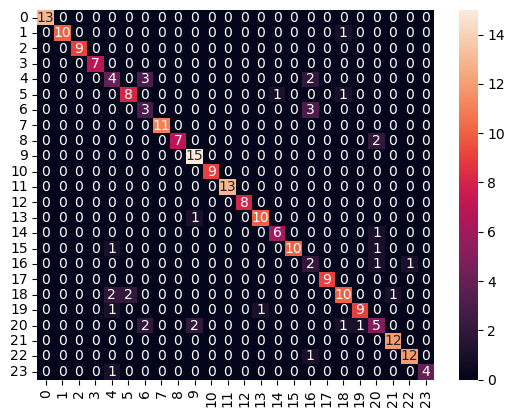

In [27]:
acc_tree = accuracy_score(y_test,ypred_tree)
print(acc_tree)
print(classification_report(y_test,ypred_tree))
sns.heatmap(confusion_matrix(y_test,ypred_tree),annot=True)
Accuracy.append(acc_tree)

From Decesion Tree Model we got a 85% accuracy for Text Precriptions

# Random Forest

In [28]:
rfmodel=RandomForestClassifier()
rfmodel.fit(X_train,y_train)
ypred_RF=rfmodel.predict(X_test)

0.9541666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         7
           4       0.75      0.67      0.71         9
           5       1.00      0.90      0.95        10
           6       0.75      1.00      0.86         6
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00         9
           9       0.94      1.00      0.97        15
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        11
          14       0.88      1.00      0.93         7
          15       1.00      0.92      0.96        12
          16       0.50      1.00      0.67         4
        

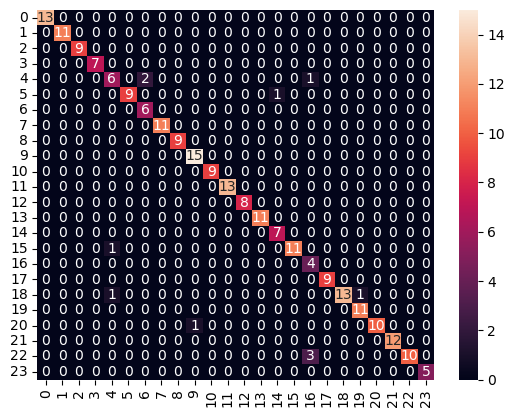

In [29]:
acc_RF = accuracy_score(y_test,ypred_RF)
print(acc_RF)
print(classification_report(y_test,ypred_RF))
sns.heatmap(confusion_matrix(y_test,ypred_RF),annot=True)
Accuracy.append(acc_RF)

From Random Forest Model we got 96% accuracy For Text Precriptions

# Gradient Boost

In [30]:
model=GradientBoostingClassifier(n_estimators=100)
model.fit(X_train,y_train)
ypred_GB=model.predict(X_test)

0.9125
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        11
           2       1.00      0.89      0.94         9
           3       1.00      1.00      1.00         7
           4       0.86      0.67      0.75         9
           5       1.00      0.80      0.89        10
           6       0.71      0.83      0.77         6
           7       1.00      1.00      1.00        11
           8       1.00      0.89      0.94         9
           9       1.00      0.93      0.97        15
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        11
          14       0.88      1.00      0.93         7
          15       1.00      0.92      0.96        12
          16       0.44      1.00      0.62         4
          17       1

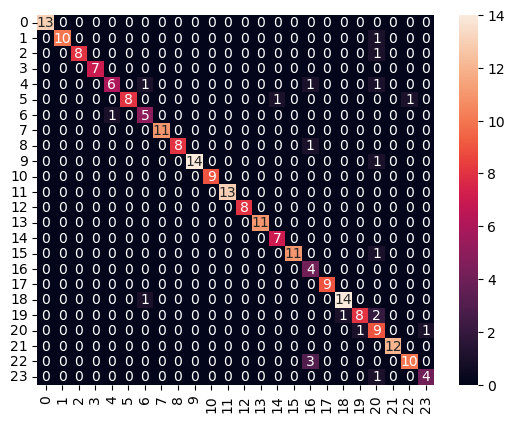

In [31]:
acc_GB= accuracy_score(y_test,ypred_GB)
print(acc_GB)
print(classification_report(y_test,ypred_GB))
sns.heatmap(confusion_matrix(y_test,ypred_GB),annot=True)
Accuracy.append(acc_GB)

from Gradient Boost Model we got 90% accuracy for Text Precriptions

# Adaboost

In [32]:
model=AdaBoostClassifier(n_estimators=50)
model.fit(X_train,y_train)
ypred_ada=model.predict(X_test)

0.1375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         6
           7       1.00      1.00      1.00        11
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        15
          10       0.28      0.56      0.37         9
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00        12
          16       0.02      1.00      0.04         4
          17       0

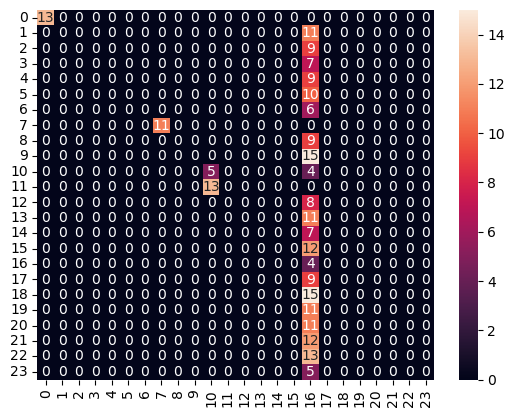

In [33]:
acc_ada= accuracy_score(y_test,ypred_ada)
print(acc_ada)
print(classification_report(y_test,ypred_ada))
sns.heatmap(confusion_matrix(y_test,ypred_ada),annot=True)
Accuracy.append(acc_ada)

from AdaBoost Model we got 13% accuracy for Text Precriptions

# XGBoost

In [34]:
model=XGBClassifier(n_estimators=50)
model.fit(X_train,y_train)
ypred_XGB=model.predict(X_test)

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         7
           4       0.86      0.67      0.75         9
           5       1.00      0.90      0.95        10
           6       0.80      0.67      0.73         6
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         8
          13       0.92      1.00      0.96        11
          14       1.00      1.00      1.00         7
          15       0.92      0.92      0.92        12
          16       0.38      0.75      0.50         4
        

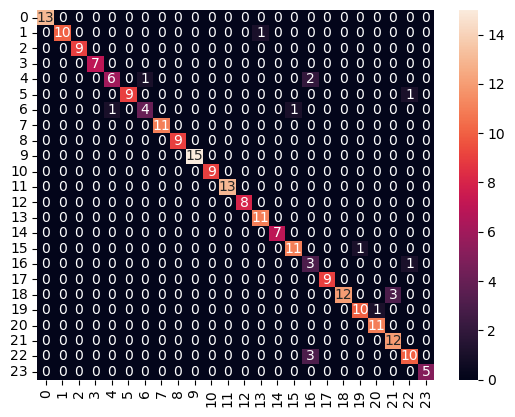

In [35]:
acc_XGB= accuracy_score(y_test,ypred_XGB)
print(acc_XGB)
print(classification_report(y_test,ypred_XGB))
sns.heatmap(confusion_matrix(y_test,ypred_XGB),annot=True)
Accuracy.append(acc_XGB)

from XGBoost Model we got 93% accuracy for Text Precriptions

In [36]:
import pandas as pd

models = ["Logistic Regression", "Multinomial", "KNN", "Decision Tree", "Random Forest", "Gradient Boost", "Adaboost", "XGBoost"]
accuracy_scores = [0.9625, 0.9458, 0.9250, 0.8583, 0.9666, 0.9, 0.13, 0.93]

evaluation = pd.DataFrame({'models': models[:len(accuracy_scores)], 'Accuracy': accuracy_scores})
evaluation


models  Accuracy
0  Logistic Regression    0.9625
1          Multinomial    0.9458
2                  KNN    0.9250
3        Decision Tree    0.8583
4        Random Forest    0.9666
5       Gradient Boost    0.9000
6             Adaboost    0.1300
7              XGBoost    0.9300

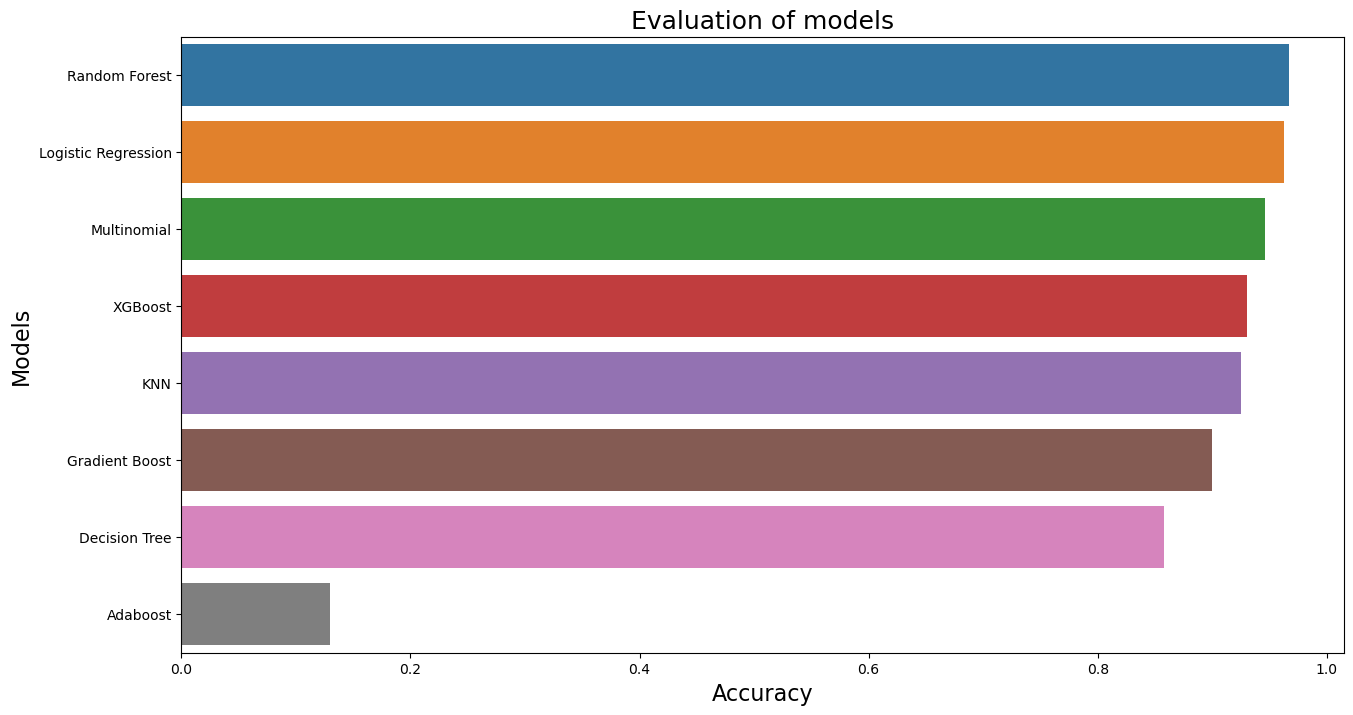

In [37]:
evaluation.sort_values(by='Accuracy', ascending=False, inplace=True)
plt.figure(figsize=(15, 8))
sns.barplot(x='Accuracy', y='models', data=evaluation)
plt.xlabel('Accuracy', fontdict={'fontsize': 16})
plt.ylabel('Models', fontdict={'fontsize': 16})
plt.title('Evaluation of models', fontdict={'fontsize': 18})
plt.show()

# Conclusion
from above Model Evaluation Graph we can see that from all
model "Random Forest" Model has more accuracy compare to Other Models, hence we select "Random Forest" as best Model

# Saving The Model 
   saving the model into joblib file.

In [38]:
import joblib

# Save the trained model
joblib.dump(rfmodel, 'model.pkl')

['model.pkl']

In [39]:
# Save the vectorizer
joblib.dump(cv, 'vectorizer.pkl')

['vectorizer.pkl']

In [40]:
import joblib

# Load the trained model
model = joblib.load('model.pkl')


In [41]:
# Load the vectorizer
vectorizer = joblib.load('vectorizer.pkl')

# Predicting on the Unknown Data 

In [42]:
#loading the unknow data
dz = pd.read_csv('testtttt.csv')
dz

Unnamed: 0      label                                               text
0             0  Psoriasis  My skin has a silvery layer over it, especiall...
1             1  Psoriasis  My arms, face and backÂ are all red and irrita...
2             2  Psoriasis  I've had trouble sleeping because of the itchi...
3             3  Psoriasis  My fingers and soles have pretty thick skin th...
4             4  Psoriasis  My skin has changed from being less sensitive ...
..          ...        ...                                                ...
235         235   diabetes  I'm shaking and trembling all over. I've lost ...
236         236   diabetes  Particularly in the crevices of my skin, I hav...
237         237   diabetes  I regularly experience these intense urges and...
238         238   diabetes  I have trouble breathing, especially outside. ...
239         239   diabetes  I constantly sneeze and have a dry cough. My i...

[240 rows x 3 columns]

In [43]:
#applying the Text-cleaning steps 
corpus = []
ps = PorterStemmer()

for i in range(len(dz)):
    rp = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    rp = rp.lower()
    rp = rp.split()
    rp = [ps.stem(word) for word in rp if word not in set(stopwords.words('english'))]
    rp = " ".join(rp)
    corpus.append(rp)

In [44]:
#vectorization 
Z = cv.transform(corpus).toarray()

In [45]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
test = model.predict(Z)

In [47]:
print(test)

[15 15 15 15 15 15 15 15 15 15  4 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  6  4 16  6  4  4  4  4
  4  4  4  4  4  4  4  4 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]


In [48]:
#inverse trasforming the encoded data to orignal data
inverse_label = label_encoder.inverse_transform(test)
print(inverse_label)

['Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis'
 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Chicken pox' 'Psoriasis'
 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis'
 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis'
 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis'
 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis'
 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis'
 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis' 'Psoriasis'
 'Psoriasis' 'Psoriasis' 'Varicose Veins' 'Varicose Veins'
 'Varicose Veins' 'Varicose Veins' 'Varicose Veins' 'Varicose Veins'
 'Varicose Veins' 'Varicose Veins' 'Varicose Veins' 'Varicose Veins'
 'Varicose Veins' 'Varicose Veins' 'Varicose Veins' 'Varicose Veins'
 'Varicose Veins' 'Varicose Veins' 'Varicose Veins' 'Varicose Veins'
 'Varicose Veins' 'Varicose Veins' 'Varicose Veins' 'Varicose Veins'
 'Varicose